In [2]:
import pandas as pd

In [4]:
bank = pd.read_csv('bank-full.csv', sep = ';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank['marital']       = le.fit_transform(bank['marital'])
bank['job'] = le.fit_transform(bank['job'])
bank['education'] = le.fit_transform(bank['education'])
bank['default'] = le.fit_transform(bank['default'])
bank['housing'] = le.fit_transform(bank['housing'])
bank['loan'] = le.fit_transform(bank['loan'])
bank['contact'] = le.fit_transform(bank['contact'])
bank['month'] = le.fit_transform(bank['month'])
bank['poutcome'] = le.fit_transform(bank['poutcome'])
bank['y'] = le.fit_transform(bank['y'])

bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [7]:
bank.dtypes

age          int64
job          int32
marital      int64
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

In [38]:
X=bank.drop(axis= 1,labels='y')
y=bank[['y']]

In [39]:
X.shape, y.shape

((45211, 16), (45211, 1))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [41]:
X_train.shape,y_train.shape

((36168, 16), (36168, 1))

In [42]:
X_test.shape, y_test.shape

((9043, 16), (9043, 1))

In [43]:
!pip install xgboost
!pip install lightgbm

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

from xgboost import XGBClassifier
from lightgbm import  LGBMClassifier
from lightgbm import LGBMClassifier

In [67]:
rf_classifier   = RandomForestClassifier()
gb_classifier   = GradientBoostingClassifier()
adb_classifier  = AdaBoostClassifier()
xgb_classifier  = XGBClassifier()
lgbm_classifier = LGBMClassifier()

In [68]:
lgbm_classifier = LGBMClassifier

In [69]:
%%time
rf_classifier.fit(X_train,y_train)

Wall time: 3.77 s


RandomForestClassifier()

In [70]:
%%time
gb_classifier.fit(X_train,y_train)

Wall time: 4.28 s


GradientBoostingClassifier()

In [71]:
%%time
adb_classifier.fit(X_train,y_train)

Wall time: 1.3 s


AdaBoostClassifier()

In [72]:
%%time
xgb_classifier.fit(X_train,y_train)

Wall time: 1.38 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [75]:
y_pred_rf   = rf_classifier.predict(X_test)
y_pred_adb  = adb_classifier.predict(X_test)
y_pred_gb   = gb_classifier.predict(X_test)
y_pred_xgb  = xgb_classifier.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [77]:
print('Accuracy score  : ',round(accuracy_score(y_test,y_pred_rf),4))
print('Precision score : ',round(precision_score(y_test,y_pred_rf),4))
print('Recall score    : ',round(recall_score(y_test,y_pred_rf),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_rf))

Accuracy score  :  0.9052
Precision score :  0.6382
Recall score    :  0.4386
Confusion Matrix:
 [[7722  263]
 [ 594  464]]


In [78]:
print('Accuracy score  : ',round(accuracy_score(y_test,y_pred_adb),4))
print('Precision score : ',round(precision_score(y_test,y_pred_adb),4))
print('Recall score    : ',round(recall_score(y_test,y_pred_adb),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_adb))

Accuracy score  :  0.898
Precision score :  0.6164
Recall score    :  0.3403
Confusion Matrix:
 [[7761  224]
 [ 698  360]]


In [79]:
print('Accuracy score  : ',round(accuracy_score(y_test,y_pred_gb),4))
print('Precision score : ',round(precision_score(y_test,y_pred_gb),4))
print('Recall score    : ',round(recall_score(y_test,y_pred_gb),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_gb))

Accuracy score  :  0.9046
Precision score :  0.6512
Recall score    :  0.397
Confusion Matrix:
 [[7760  225]
 [ 638  420]]


In [80]:
print('Accuracy score  : ',round(accuracy_score(y_test,y_pred_xgb),4))
print('Precision score : ',round(precision_score(y_test,y_pred_xgb),4))
print('Recall score    : ',round(recall_score(y_test,y_pred_xgb),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_xgb))

Accuracy score  :  0.902
Precision score :  0.6029
Recall score    :  0.4764
Confusion Matrix:
 [[7653  332]
 [ 554  504]]


In [81]:
rf_features   = rf_classifier.feature_importances_
adb_features  = adb_classifier.feature_importances_
gb_features   = gb_classifier.feature_importances_
xgb_features  = xgb_classifier.feature_importances_

In [82]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [83]:
features_importance = pd.DataFrame({'Features'      :X_train.columns,
                                    'RF_Features'   :rf_features,
                                    'ADB_Features'  :adb_features,
                                    'GB_Features'   :gb_features,
                                    'XGBM_Features' :xgb_features})
features_importance

,Features,RF_Features,ADB_Features,GB_Features,XGBM_Features
0,age,0.104276,0.06,0.041696,0.031475
1,job,0.049710,0.02,0.001585,0.020908
2,marital,0.021604,0.02,0.007404,0.030411
3,education,0.027807,0.04,0.002818,0.024376
4,default,0.001829,0.00,0.000000,0.008495
5,balance,0.109287,0.02,0.006775,0.022979
6,housing,0.025882,0.04,0.047912,0.097941
7,loan,0.010065,0.02,0.004452,0.066702
8,contact,0.019950,0.04,0.051355,0.145591
9,day,0.089714,0.04,0.011621,0.029256


In [85]:
rf_imp_features = features_importance.sort_values(by = 'RF_Features',axis=0,ascending=False)
rf_imp_features

,Features,RF_Features,ADB_Features,GB_Features,XGBM_Features
11,duration,0.290365,0.28,0.480083,0.121113
5,balance,0.109287,0.02,0.006775,0.022979
0,age,0.104276,0.06,0.041696,0.031475
9,day,0.089714,0.04,0.011621,0.029256
10,month,0.088690,0.24,0.137816,0.084217
15,poutcome,0.052983,0.06,0.105542,0.195454
13,pdays,0.050163,0.06,0.093844,0.062141
1,job,0.049710,0.02,0.001585,0.020908
12,campaign,0.038396,0.04,0.004577,0.027526
3,education,0.027807,0.04,0.002818,0.024376


In [86]:
import seaborn as sns
from matplotlib import pyplot as plt

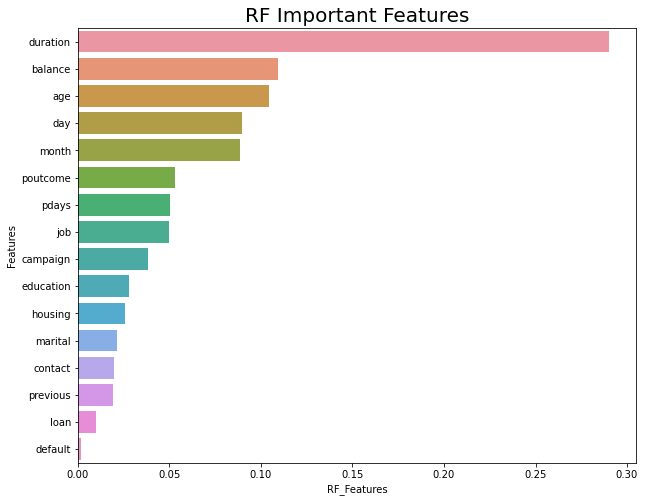

In [87]:
plt.figure(figsize=(10,8))
sns.barplot(x='RF_Features',y='Features',data=rf_imp_features)
plt.title('RF Important Features',size = 20)
plt.show()